 # Warm-Up: Turning Bad Charts into Compelling Data Stories 
 
 Check out [this TED Talk](https://www.youtube.com/watch?v=edAf1jx1wh8&ab_channel=TEDxTalks) by Dominic Bohan.

 What are the three important factors he says are necessary for "Compelling Data Stories"
 1. Choosing human-friendly graphics (position and length being one of the easiest characteristics for humans to differentiate)
 2. Ruthlessly minimalism (removing anything not necessary from the graphic)
 3. Highlighting a clear takeaway (thinking what you want the person to learn from the graphic)




# Graph Vocabulary

Review the following vocabulary words. What's the function of each element of the graph?

![](https://acampb3.weebly.com/uploads/2/1/4/4/21444162/9206745_orig.jpg)

Image from [here](https://acampb3.weebly.com/parts-of-a-graph.html)

- **Title**: Gives an overview of the graph
- **x/y Axis Labels**: Explain what the x and y axes measure or represent
- ** Data**: The numbers communicated by the grap
- **Legend**: Labels data when there is more than one set of data
- **Text**: (not shown) Any words added to the graph explain what
is being shown

# Graph Analysis



## Example

### Graph 1

You have data from a school survey of ninth graders' favorite subjects. What do you think of this graph? What would you change?

0.9999999999999999


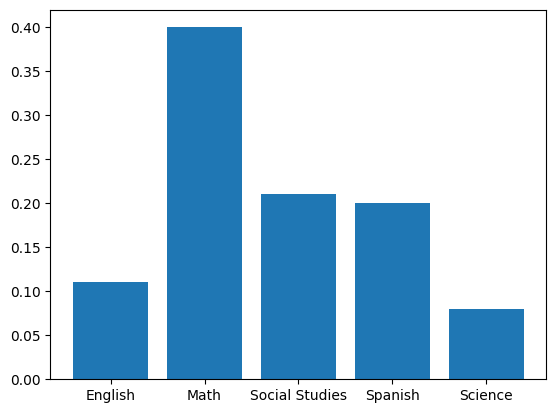

In [ ]:
import matplotlib.pyplot as plt

subjects = ['English', 'Math', 'Social Studies', 'Spanish', 'Science']
ninth = [0.11, 0.4, 0.21, 0.2, 0.08]

# print(sum(ninth))

plt.bar(subjects, ninth)
plt.show()

**Good:** It's minimalistic and each bar is labeled.

**To improve:** It's far too minimalistic. What is represented on the y-axis? What is the data being represented? It's also hard to tell what is the takeaway from the graph? Is it that Social Studies and Spanish are similar? Is it that math is the highest? This graph does not have a clear takeaway.

### Graph 2 (same data)

You have data from a school survey of ninth graders' favorite subjects. What do you think of this graph? What would you change?

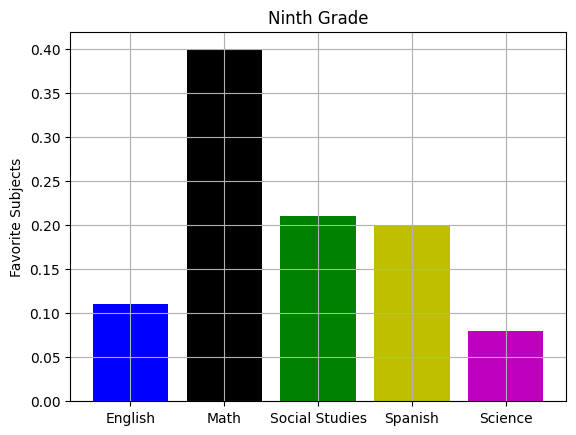

In [ ]:
import matplotlib.pyplot as plt

subjects = ['English', 'Math', 'Social Studies', 'Spanish', 'Science']
ninth = [0.11, 0.4, 0.21, 0.2, 0.08]
colors = ['b', 'k', 'g', 'y', 'm']

# print(sum(ninth))

plt.bar(subjects, ninth, 
        color=colors)

plt.grid()
plt.title('Ninth Grade')
plt.ylabel('Favorite Subjects')

plt.show()

**Good:** All of the data and axes are labeled.

**To improve:** 
- The grid lines aren't necessary
- The title and y-axis label doesn't tell us what the relationship between the x and y axes is. Perhaps a better title would be "Ninth Graders' Favorite Subjects" and an axis label would be "Percent of Students"

Below are a couple of good ways to represent this data. What do you think are the key take aways from each graphic?

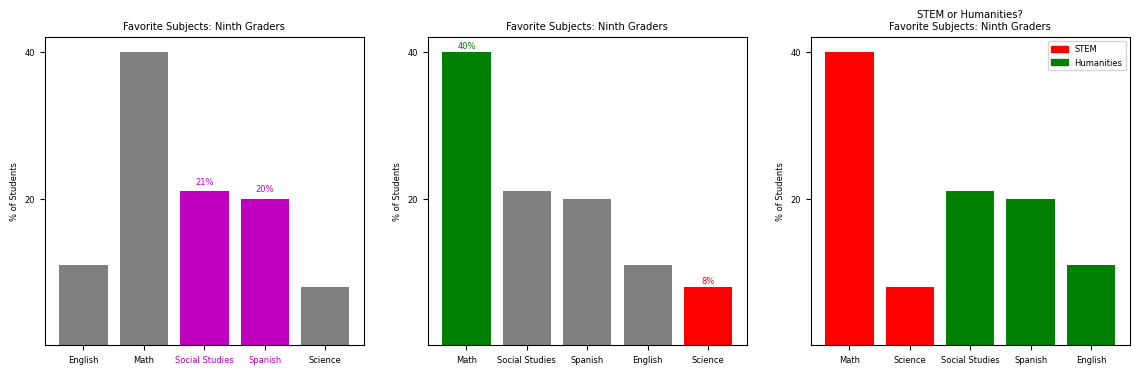

In [ ]:
import matplotlib.pyplot as plt


subjects = ['English', 'Math', 'Social Studies', 'Spanish', 'Science']
ninth = [0.11, 0.4, 0.21, 0.2, 0.08]

# change the values to percentages
ninth = [p*100 for p in ninth]

# print(sum(ninth))

fig, axes = plt.subplots(1, 3, 
                         figsize = (14, 4),
                         )

# change the font size on the graphic to make it easier to see
plt.rc('xtick', labelsize=6)   

# ----------------------------------------
# first graph
# ----------------------------------------
axes[0].bar(subjects, ninth, 
            color = ['grey', 'grey', 'm', 'm', 'grey'],

        ) 

axes[0].set_title('Favorite Subjects: Ninth Graders')
axes[0].set_ylabel('% of Students')
axes[0].set_yticks([20, 40])


# change colors of the ticks and add the bar labels
for i, t in enumerate(axes[0].xaxis.get_ticklabels()):
  if t.get_text() in ('Spanish', 'Social Studies'):
    # text color
    t.set_color('m')
    
    # bar label
    axes[0].text(i, ninth[i]+1, str(int(ninth[i])) + '%', 
                 color='m',
                 ha='center'
    )



# ----------------------------------------
# second graph
# ----------------------------------------
ninth_together = sorted(zip(ninth, subjects), reverse=True)
ninth_sorted,subjects_sorted = zip(*ninth_together)
axes[1].bar(subjects_sorted, ninth_sorted, 
           color = ['green', 'grey', 'grey', 'grey', 'red'],
        ) 

axes[1].set_title('Favorite Subjects: Ninth Graders')
axes[1].set_ylabel('% of Students')
axes[1].set_yticks([20, 40])

# add the bar labels for math (green) and science (red)
axes[1].text(0, ninth_sorted[0]+ 0.5, str(int(ninth_sorted[0])) + '%', 
                  color='g',
                  ha='center'
      )
axes[1].text(4, ninth_sorted[4]+0.5, str(int(ninth_sorted[4])) + '%', 
                  color='r',
                  ha='center'
      )



# ----------------------------------------
# second graph
# ----------------------------------------

# separate the STEM and Humanities subjects and percentages
data_dict = dict(zip(subjects_sorted, ninth_sorted))
STEM_subjects = [s for s in data_dict.keys() if s in ('Math', 'Science')]
STEM_percentage = [v for s, v in data_dict.items() if s in ('Math', 'Science')]

humanities_subjects = [s for s in data_dict.keys() if s not in ('Math', 'Science')]
humanities_percentage = [v for s, v in data_dict.items() if s not in ('Math', 'Science')]

# STEM and humanities lists are concatenated (added together)
axes[2].bar(STEM_subjects + humanities_subjects, STEM_percentage + humanities_percentage, 
           # STEM is red and Humanities will be green
           color = ['r']*len(STEM_subjects) + ['g']*len(humanities_subjects),
        ) 


# \n creates a line break
axes[2].set_title('STEM or Humanities?\nFavorite Subjects: Ninth Graders')
axes[2].set_ylabel('% of Students')
axes[2].set_yticks([20, 40])

# build the legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='STEM')
green_patch = mpatches.Patch(color='green', label='Humanities')
plt.legend(handles=[red_patch, green_patch])


plt.show()

On the left, we see that the takeaway is that ninth graders are enjoying social stdies and Spanish more or less equally. Notice that everything is grey except for the these two bars which are colored the same. 

In the middle, it seems like attention is supposed to be drawn to the fact that Math is the most favorited and science is the least. This is communicated by ordering the bars left to right by preference. The values of the two bars of interest are also given so that we can easily see that it's a 32% difference between to two. 

On the right, it seems that the idea is show the difference between STEM and humanities perception. From this particular data, it seems like we there's no particular preference for one or the other, though Math is certainly the most favorited :)


Notice that in all three of these graphs, we've reduced the number of ticks on the y-axis. The exact numbers of each bar is not as important as the values for the specific bars we're calling their attention to. 

You can look at the code used to make these graphs. While this level of difficulty might be out of the scope of this class, we will work on a couple of specific skills (coloring for example) which will allow us to make more graphs which tell data stories. 

# Student Practice

Below are the graphics for the student exercises. Students should identify what they would change about each of the graphs to make it tell a story. 

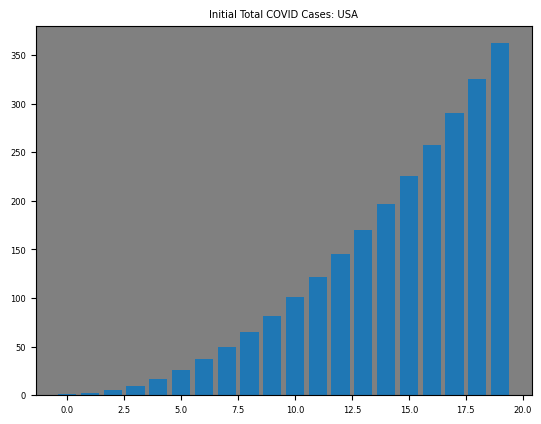

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

days = np.arange(0, 20)
days = days.astype(np.int32)
cases = days ** 2 + 1


plt.bar(days, cases)
plt.title("Initial Total COVID Cases: USA")
plt.gca().set_facecolor('grey')

plt.show()

To improve: 
- The gray background is only confusing. Get rid of the coloring and make it white. 
- A running total (in which each day we add the number from the previous day) ight be better communicated with a **line graph**
- Which axis is which? Add axis labels. The y-axis could be "number of cases". The x-axis could be labeled the "number of days." You could also label the days as dates instead of "number of of days" (e.g. Jan 2023)
- Figure out the important takeaways highlight that value (e.g. putting a line to show the day when the cases reaches an important threshold. 

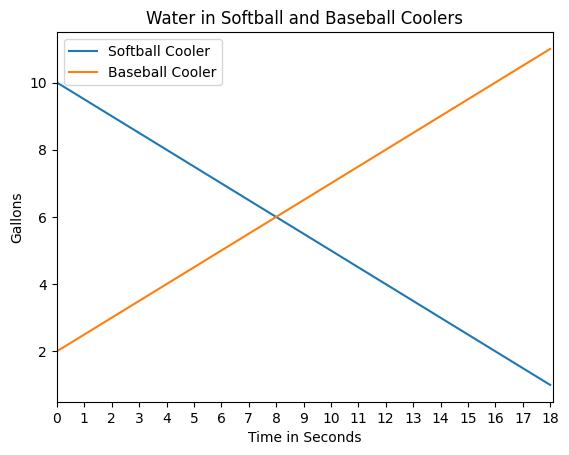

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ts = np.arange(0, 18.1, 0.5)

rate = 0.5

softball = 10 - rate*ts
baseball = 2 + rate*ts


plt.plot(ts, softball)
plt.plot(ts, baseball)
plt.legend(["Softball Cooler", "Baseball Cooler"])
plt.xlabel("Time in Seconds")
plt.ylabel("Gallons")
plt.xlim((0, 18.1))
plt.xticks(range(19))
plt.title("Water in Softball and Baseball Coolers")
plt.show()

To improve: 
- Given just the graphic, it's hard to tell the relationship between the two lines. Consider changing the title to "Pouring Water from the Softball Cooler to the Baseball Cooler"
- The y-axis label could be more specific with something like "Water (Gal)"
- The y-axis ticks are a little busy. The ticks at 4 and 8 gallons are not really necessary. The same is true of the x axis. We don't really need all of those ticks
- Make the story being told clear. Add a dot at the intersection of the two lines and add text to describe it


This one may be difficult for the students as there's nothing terribly wrong graphically. The main problems are making sure that the story is clear. For this reason, an improved graphic has been included below


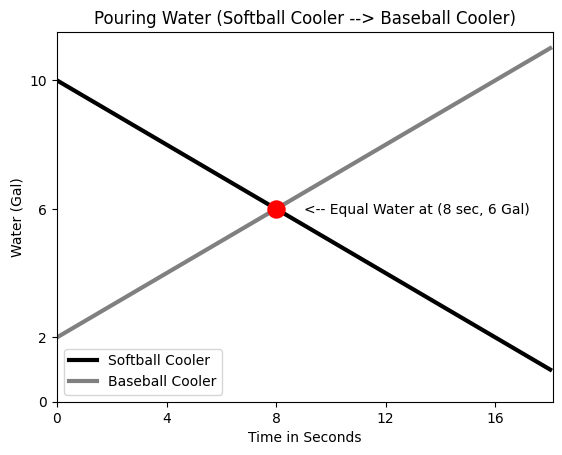

In [65]:
import numpy as np
import matplotlib.pyplot as plt

ts = np.arange(0, 18.1, 0.5)

rate = 0.5

softball = 10 - rate*ts
baseball = 2 + rate*ts


plt.plot(ts, softball,
         c='k',
         lw=3)
plt.plot(ts, baseball,
         c='grey', 
         lw=3)

plt.scatter([8],[6], 
            c='r', 
            s=150,
            zorder=150)

plt.text(9, 5.85, "<-- Equal Water at (8 sec, 6 Gal)",
         ha = 'left')


plt.legend(["Softball Cooler", "Baseball Cooler"])
plt.xlabel("Time in Seconds")
plt.ylabel("Water (Gal)")
plt.xlim((0, 18.1))
plt.xticks([0, 4, 8, 12, 16])
plt.yticks([0, 2, 6, 10])
plt.title("Pouring Water (Softball Cooler --> Baseball Cooler)")
plt.show()

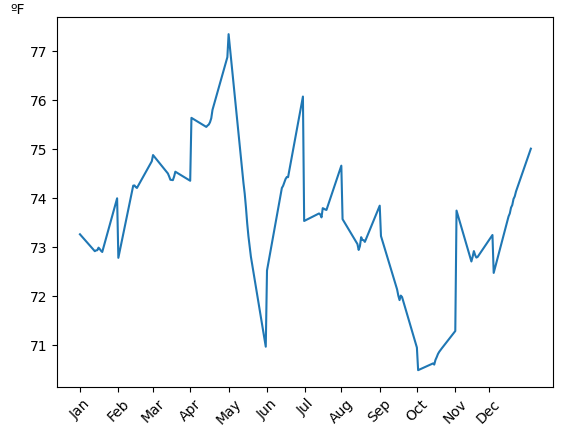

In [62]:
import numpy as np
import matplotlib.pyplot as plt

Baltimore = [73.26302535835367, 73.23428633506637, 73.20554731177906, 73.17680828849176, 73.14806926520446, 73.11933024191714, 73.09059121862984, 73.06185219534252, 73.03311317205522, 73.00437414876792, 72.97563512548061, 72.9468961021933, 72.918157078906, 72.93415707890601, 72.93815707890602, 72.99015707890601, 72.962157078906, 72.926157078906, 72.90215707890601, 72.99339993112955, 73.08464278335308, 73.17588563557662, 73.26712848780016, 73.3583713400237, 73.44961419224724, 73.54085704447078, 73.63209989669433, 73.72334274891786, 73.8145856011414, 73.90582845336495, 73.99707130558848, 72.78276923076922, 72.90553846153846, 73.02830769230768, 73.15107692307691, 73.27384615384614, 73.39661538461537, 73.51938461538461, 73.64215384615383, 73.76492307692307, 73.88769230769229, 74.01046153846153, 74.13323076923076, 74.25599999999999, 74.25999999999999, 74.22799999999998, 74.208, 74.25346153846154, 74.29892307692307, 74.34438461538461, 74.38984615384615, 74.43530769230769, 74.48076923076923, 74.52623076923076, 74.5716923076923, 74.61715384615384, 74.66261538461538, 74.7080769230769, 74.75353846153844, 74.87969230769231, 74.84838461538462, 74.81707692307693, 74.78576923076923, 74.75446153846154, 74.72315384615385, 74.69184615384616, 74.66053846153847, 74.62923076923077, 74.59792307692308, 74.56661538461539, 74.5353076923077, 74.504, 74.444, 74.37599999999999, 74.372, 74.368, 74.44, 74.53999999999999, 74.52461538461539, 74.50923076923078, 74.49384615384616, 74.47846153846154, 74.46307692307693, 74.44769230769231, 74.43230769230769, 74.41692307692307, 74.40153846153845, 74.38615384615383, 74.37076923076921, 74.35538461538461, 75.6389144358679, 75.62351370093606, 75.60811296600423, 75.59271223107238, 75.57731149614055, 75.56191076120871, 75.54651002627688, 75.53110929134503, 75.5157085564132, 75.50030782148136, 75.48490708654953, 75.46950635161768, 75.45410561668585, 75.48210561668584, 75.50210561668584, 75.55010561668584, 75.63010561668584, 75.80210561668585, 75.89165626476499, 75.98120691284413, 76.07075756092325, 76.1603082090024, 76.24985885708153, 76.33940950516067, 76.4289601532398, 76.51851080131894, 76.60806144939808, 76.69761209747722, 76.78716274555634, 76.87671339363548, 77.34675806884796, 77.09366747917068, 76.8405768894934, 76.58748629981612, 76.33439571013884, 76.08130512046155, 75.82821453078428, 75.575123941107, 75.32203335142971, 75.06894276175242, 74.81585217207515, 74.56276158239787, 74.30967099272058, 74.09367099272059, 73.81367099272059, 73.48967099272059, 73.22567099272058, 73.0176709927206, 72.80567099272058, 72.6526183654217, 72.49956573812281, 72.34651311082393, 72.19346048352504, 72.04040785622615, 71.88735522892728, 71.73430260162839, 71.5812499743295, 71.4281973470306, 71.27514471973171, 71.12209209243284, 70.96903946513395, 72.52430769230769, 72.66461538461537, 72.80492307692307, 72.94523076923076, 73.08553846153846, 73.22584615384615, 73.36615384615384, 73.50646153846154, 73.64676923076922, 73.78707692307692, 73.92738461538461, 74.0676923076923, 74.20799999999998, 74.252, 74.31999999999998, 74.392, 74.43199999999999, 74.42799999999998, 74.56515384615383, 74.70230769230768, 74.83946153846153, 74.97661538461537, 75.11376923076922, 75.25092307692307, 75.38807692307691, 75.52523076923076, 75.66238461538461, 75.79953846153845, 75.9366923076923, 76.07384615384615, 73.53476923076924, 73.54753846153848, 73.5603076923077, 73.57307692307694, 73.58584615384616, 73.5986153846154, 73.61138461538462, 73.62415384615386, 73.63692307692308, 73.64969230769232, 73.66246153846156, 73.67523076923078, 73.688, 73.66799999999999, 73.60799999999999, 73.79599999999998, 73.78399999999999, 73.76799999999999, 73.75999999999999, 73.83530769230768, 73.91061538461537, 73.98592307692306, 74.06123076923076, 74.13653846153845, 74.21184615384614, 74.28715384615383, 74.36246153846153, 74.43776923076922, 74.51307692307691, 74.5883846153846, 74.66369230769229, 73.57169230769232, 73.52938461538463, 73.48707692307693, 73.44476923076924, 73.40246153846154, 73.36015384615385, 73.31784615384616, 73.27553846153846, 73.23323076923077, 73.19092307692307, 73.14861538461538, 73.1063076923077, 73.06399999999998, 72.944, 73.01999999999998, 73.20399999999998, 73.14799999999997, 73.14399999999998, 73.10799999999999, 73.16961538461535, 73.23123076923075, 73.29284615384613, 73.3544615384615, 73.4160769230769, 73.47769230769228, 73.53930769230766, 73.60092307692305, 73.66253846153843, 73.72415384615383, 73.7857692307692, 73.84738461538458, 73.2276923076923, 73.1443846153846, 73.06107692307691, 72.97776923076921, 72.89446153846153, 72.81115384615383, 72.72784615384614, 72.64453846153845, 72.56123076923076, 72.47792307692306, 72.39461538461536, 72.31130769230768, 72.228, 72.13999999999999, 72.012, 71.91999999999999, 72.01199999999999, 71.98399999999998, 71.898, 71.812, 71.726, 71.64, 71.554, 71.468, 71.382, 71.296, 71.21000000000001, 71.12400000000001, 71.03800000000001, 70.95200000000001, 70.49046153846155, 70.50192307692308, 70.51338461538462, 70.52484615384616, 70.5363076923077, 70.54776923076923, 70.55923076923078, 70.57069230769231, 70.58215384615386, 70.59361538461539, 70.60507692307692, 70.61653846153847, 70.628, 70.60399999999998, 70.69999999999999, 70.75599999999999, 70.81999999999998, 70.86399999999999, 70.89999999999999, 70.93246153846157, 70.9649230769231, 70.99738461538465, 71.02984615384618, 71.06230769230773, 71.09476923076926, 71.1272307692308, 71.15969230769234, 71.19215384615389, 71.22461538461542, 71.25707692307697, 71.2895384615385, 73.74646153846155, 73.65992307692308, 73.57338461538463, 73.48684615384616, 73.40030769230769, 73.31376923076924, 73.22723076923077, 73.1406923076923, 73.05415384615384, 72.96761538461539, 72.88107692307692, 72.79453846153845, 72.708, 72.804, 72.91999999999997, 72.84, 72.78799999999998, 72.79999999999998, 72.83738461538461, 72.87476923076922, 72.91215384615384, 72.94953846153845, 72.98692307692306, 73.02430769230769, 73.0616923076923, 73.09907692307691, 73.13646153846153, 73.17384615384614, 73.21123076923077, 73.24861538461538, 72.47507692307694, 72.57115384615386, 72.66723076923078, 72.7633076923077, 72.85938461538463, 72.95546153846155, 73.05153846153847, 73.14761538461539, 73.24369230769233, 73.33976923076925, 73.43584615384617, 73.53192307692309, 73.62799999999999, 73.68799999999997, 73.80799999999999, 73.86, 73.98399999999998, 74.03599999999999, 74.136, 74.20884615384614, 74.2816923076923, 74.35453846153845, 74.4273846153846, 74.50023076923075, 74.57307692307691, 74.64592307692307, 74.71876923076921, 74.79161538461537, 74.86446153846153, 74.93730769230767, 75.01015384615383]

plt.plot(Baltimore)
plt.xticks(ticks = [0, 31, 59, 89, 120, 151, 182, 211, 242, 272, 303, 330],
          labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation = 45,
           )
plt.ylabel('ºF', loc='top', rotation=0)

plt.show()

To improve: 
- add a title and a graph to tell the reader what we're looking at
- the ºF is good but appears high and to the left, making it unclear that it's labeling the y axis
- what are the key takeaways from this graphic? What do we want attention to be brought to? Maybe add a reference line where the max, min, or average temperatures are
- something doesn't quite seem right about this data... why is there a low dip in June and why is the minimum temperature just under 71? It makes it seem like something is off... If you get something like this make sure you check your data source! Always use your intuition!